In [1]:
import rdkit
from rdkit import Chem

In [2]:
print(rdkit.Chem.MolToMolBlock(rdkit.Chem.MolFromSmiles('C1CCC1')))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



# Reading, Drawing, and Writing Molecules

https://www.rdkit.org/docs/GettingStartedInPython.html

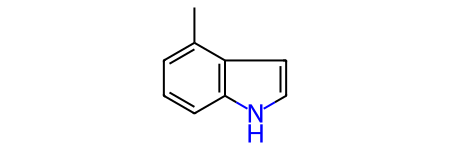

In [5]:
# Individual molecules can be constructed using a variety of approaches

m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromMolFile('../data/input.mol')

m

In [6]:
Chem.MolToSmiles(m)

'Cc1cccc2[nH]ccc12'


  Marvin  08160807402D          

  9  9  0  0  1  0            999 V2000
    0.0000    2.4750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    2.0625    0.0000 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.4289    2.4750    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145    1.2375    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4289   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7145   -0.4125    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.8250    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  1  6  0  0  0
  2  4  1  0  0  0  0
  4  5  4  0  0  0  0
  5  6  4  0  0  0  0
  6  7  4  0  0  0  0
  7  8  4  0  0  0  0
  8  9  4  0  0  0  0
  4  9  4  0  0  0  0
M  END



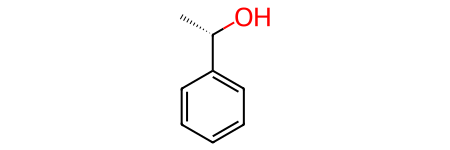

In [27]:
stringWithMolData=open('../data/chiral.mol','r').read()
print(stringWithMolData)

m = Chem.MolFromMolBlock(stringWithMolData)
m

In [29]:
from rdkit.Chem import Draw

img = Draw.MolToImage(m)

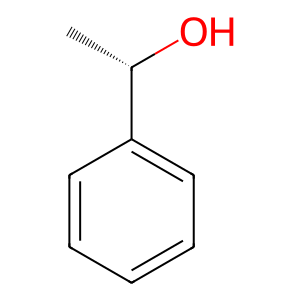

In [30]:
img

## Reading sets of molecules

In [31]:
suppl = Chem.SDMolSupplier('../data/refined-set/1a1e/1a1e_ligand.sdf')

for mol in suppl:
  print(mol.GetNumAtoms())

38


[16:23:48] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [33]:
mols = [x for x in suppl]

mols

[16:24:10] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [34]:
suppl[0].GetNumAtoms()

[16:24:20] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


38

In [35]:
# context - good practice 

with Chem.SDMolSupplier('../data/refined-set/1a1e/1a1e_ligand.sdf') as suppl:
  for mol in suppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

38


[16:25:18] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [ ]:
i = 0
with Chem.MultithreadedSDMolSupplier('../data/refined-set/1a1e/1a1e_ligand.sdf') as sdSupl:
  for mol in sdSupl:
    if mol is not None:
      i += 1

print(i)

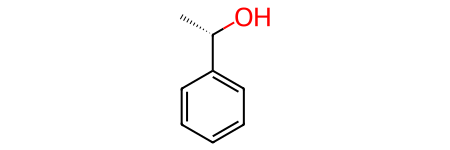

In [3]:
m = Chem.MolFromMolFile('../data/chiral.mol')
m

In [4]:
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'